# Lecture 1

In [ ]:
%pip install -Uqq duckduckgo_search

Note: you may need to restart the kernel to use updated packages.


## Fetch the data

In [ ]:
from fastcore.all import *

BASE_PATH = Path("../assets/")

In [ ]:
from duckduckgo_search import DDGS

def search_images(term, max_images=200): return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

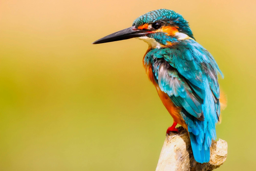

In [ ]:
from fastdownload import download_url
dest = BASE_PATH / "lecture-1-bird.jpg"
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

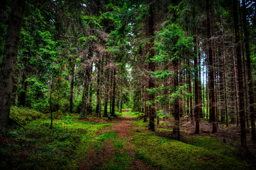

In [ ]:
download_url(search_images('forest photos', max_images=1)[0], BASE_PATH / 'forest.jpg', show_progress=False)
Image.open(BASE_PATH / 'forest.jpg').to_thumb(256,256)

In [ ]:
searches = 'forest','bird'
path = Path("/Users/akhilvempali/Documents/tmp/")
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

18

## Training the model

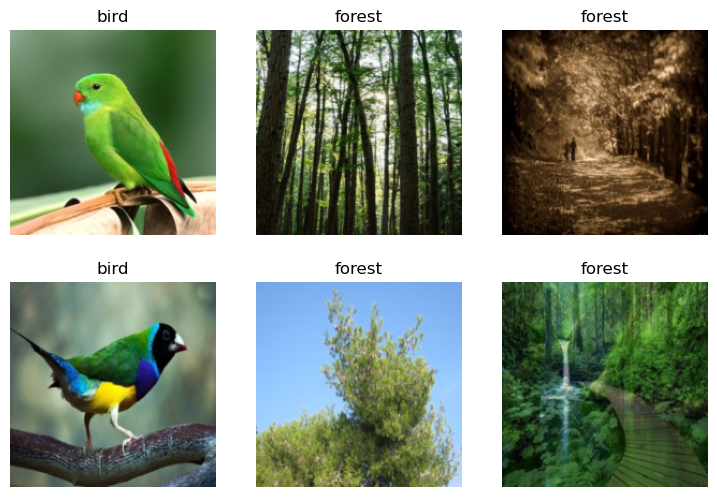

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)
     

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.045456,0.195682,0.045226,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.182339,0.083122,0.015075,00:17
1,0.099367,0.093427,0.020101,00:17
2,0.063069,0.085321,0.025126,00:15


## Making predictions

This is a: bird.
Probability it's a bird: 1.0000


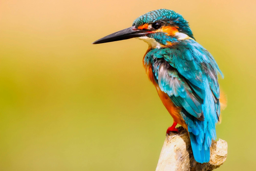

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create(BASE_PATH / 'lecture-1-bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")
Image.open(BASE_PATH / 'lecture-1-bird.jpg').to_thumb(256, 256)